In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd


In [5]:
#Read the CSV file and display the first five rows
# Dataset Overview:
import os

# Construct the relative path
relative_path = os.path.join("data/raw", "retail_sales_dataset.csv")

df = pd.read_csv(relative_path)
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
#Displays summary information 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
#Display summary statistics
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
#Unique Values
print("Unique Genders:", df['Gender'].unique())
print("Unique Product Categories:", df['Product Category'].unique())
print("Unique Customer IDs:", df['Customer ID'].nunique())

Unique Genders: ['Male' 'Female']
Unique Product Categories: ['Beauty' 'Clothing' 'Electronics']
Unique Customer IDs: 1000


*The dataset contains 1000 records. The average age of the population is around 41 years.
The average quantity purchased per transaction is around 2-3.*

*There are 1000 unique customers. The product categories include Beauty, Clothing, and Electronics.
The genders include male and female.*

In [9]:
# Average amount by month

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['Date'])

# Add a 'month' column to extract the month and year
df['month'] = df['date'].dt.to_period('M')

# Group by month and calculate the average amount
monthly_avg = df.groupby('month')['Total Amount'].mean()

print(monthly_avg)

month
2023-01    466.447368
2023-02    518.352941
2023-03    397.123288
2023-04    393.837209
2023-05    506.190476
2023-06    476.818182
2023-07    492.569444
2023-08    393.191489
2023-09    363.384615
2023-10    485.208333
2023-11    447.692308
2023-12    491.098901
2024-01    765.000000
Freq: M, Name: Total Amount, dtype: float64


In [10]:
# Maximum amount by month
# Group by month and calculate the maximum amount
monthly_max = df.groupby('month')['Total Amount'].max()

monthly_max


month
2023-01    2000
2023-02    2000
2023-03    2000
2023-04    2000
2023-05    2000
2023-06    2000
2023-07    2000
2023-08    2000
2023-09    2000
2023-10    2000
2023-11    2000
2023-12    2000
2024-01    1500
Freq: M, Name: Total Amount, dtype: int64

In [14]:
# Minimum amount by month
# Group by month and calculate the maximum amount
monthly_min = df.groupby('month')['Total Amount'].min()

monthly_min

month
2023-01    25
2023-02    25
2023-03    25
2023-04    25
2023-05    25
2023-06    25
2023-07    25
2023-08    25
2023-09    25
2023-10    25
2023-11    25
2023-12    25
2024-01    30
Freq: M, Name: Total Amount, dtype: int64

In [19]:
# Top performing category monthly

# Group by month and category, then calculate total sales (sum of 'amount')
monthly_sales = df.groupby(['month', 'Product Category'])['Total Amount'].sum().reset_index()

# Top performing category
tes = monthly_sales.loc[monthly_sales.groupby('month')['Total Amount'].idxmax()]
tes



,month,Product Category,Total Amount
1,2023-01,Clothing,13125
5,2023-02,Electronics,15465
7,2023-03,Clothing,15065
10,2023-04,Clothing,13940
14,2023-05,Electronics,23245
17,2023-06,Electronics,15550
18,2023-07,Beauty,16090
23,2023-08,Electronics,14715
25,2023-09,Clothing,9975
29,2023-10,Electronics,17910


*The monthly average sales varies roughly between 350 to 750. The maximum monthly sales is around 2000, 
and the minimum monthly sales is 25.*

*Over the span of one year, Electronics emerged as the top-performing category for six months, while Clothing held the lead for five months*

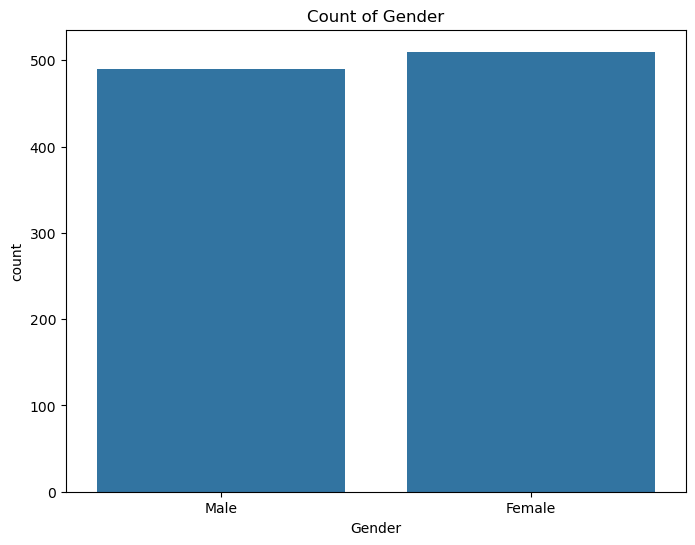

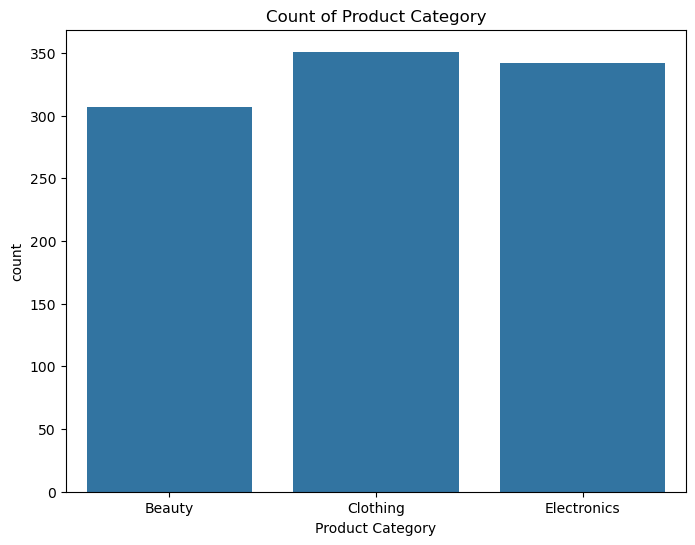

In [7]:
# Distribution of Categorical Variables:
categorical_cols = ['Gender', 'Product Category']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}')
    plt.show()

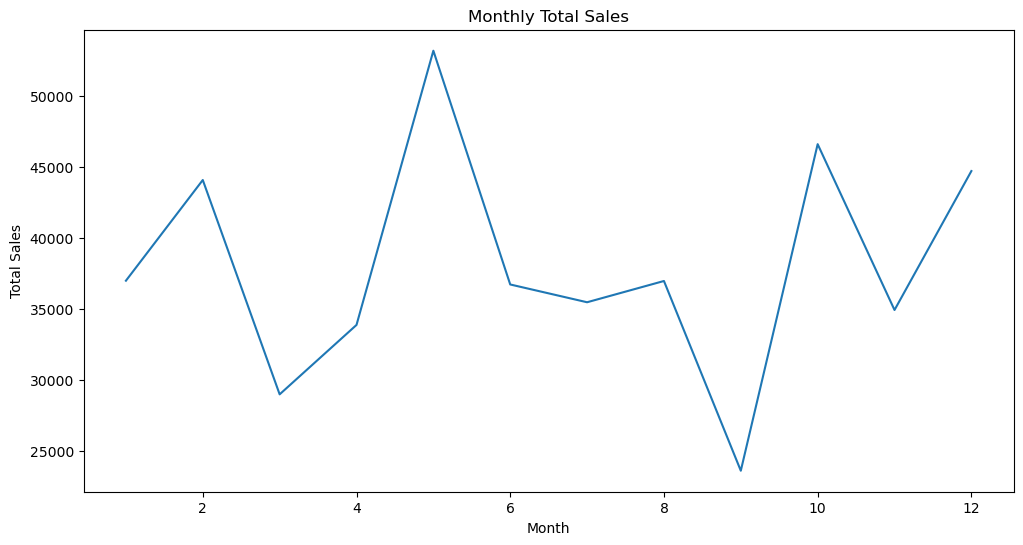

In [25]:
#Time Series Analysis (Date):
plt.figure(figsize=(12, 6))
df.groupby(pd.to_datetime(df['Date']).dt.month)['Total Amount'].sum().plot()
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

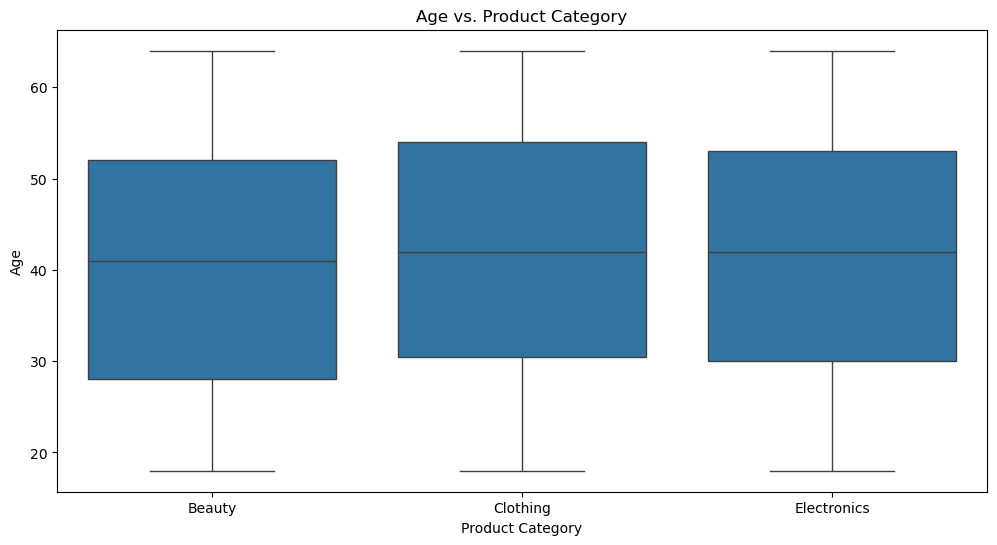

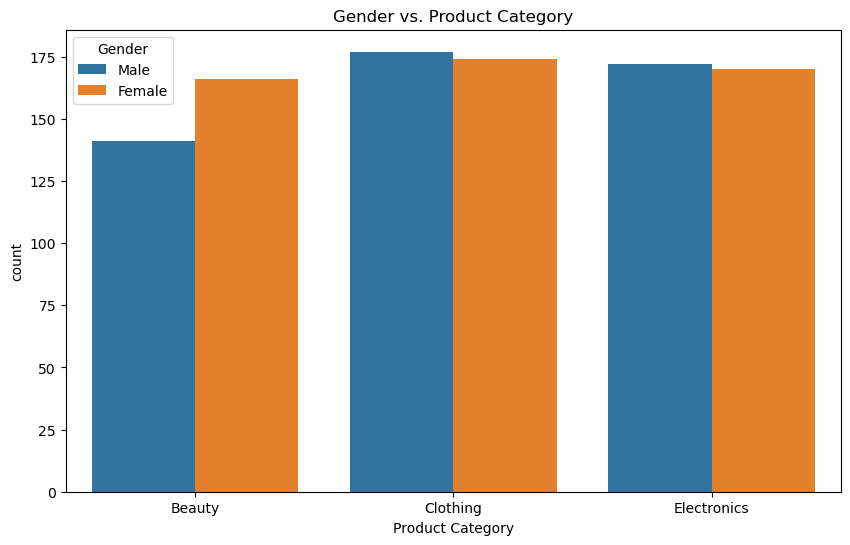

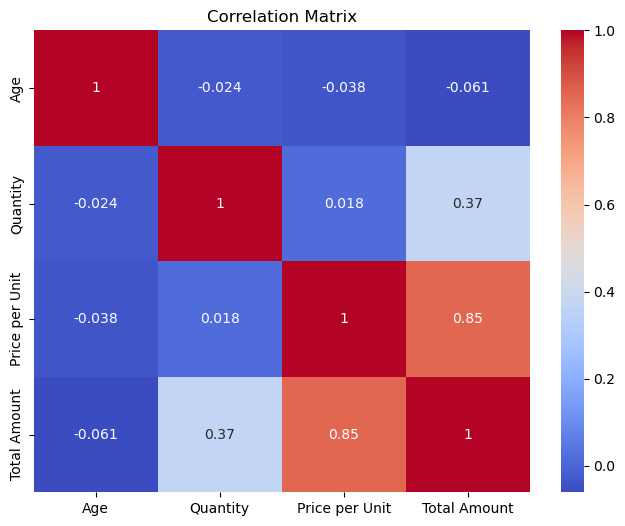

In [26]:
#Relationships Between Variables:
# Age vs. Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Age', data=df)
plt.title('Age vs. Product Category')
plt.show()

# Gender vs. Product Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', hue='Gender', data=df)
plt.title('Gender vs. Product Category')
plt.show()

# Correlation Matrix (Numerical Columns)
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()